<h1>Step 1: Install Required Libraries</h1>

In [43]:
!pip install gymnasium numpy matplotlib

<h2>Then, import the required libraries<h2>

In [44]:
import gymnasium as gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2>Select the CartPole-v1 environment from the Gymnasium library.</h2>

In [45]:
#It creates a simulation environment called CartPole-v1 from the Gym library.
cartpole_env = gym.make("CartPole-v1", render_mode=None)

<h1>Step 2: Mean Reward and Standard Deviation of a Random Policy<h1>

In [49]:
# Define a function to execute a random policy
def random_policy(environment, num_episodes=40):
    """
    Executes a random action selection policy in the given environment.

    Parameters:
        environment: The environment in which the policy is executed.
        num_episodes (int): Number of episodes to run the policy (default is 40).

    Returns:
        episode_rewards (list): Total rewards collected in each episode.
        mean_reward (float): Average reward over all episodes.
        std_reward (float): Standard deviation of rewards across episodes.
    """

    episode_rewards = []  # List to store total rewards for each episode

    # Execute the policy for a specified number of episodes
    for _ in range(num_episodes):
        state, _ = environment.reset()  # Reset the environment and obtain the initial state
        cumulative_reward = 0  # Initialize the total reward for the current episode
        done = False  # Flag to indicate whether the episode has ended

        # Continue taking random actions until the episode terminates
        while not done:
            # Select a random action from the environment's action space
            action = environment.action_space.sample()

            # Apply the selected action and receive the next state, reward, and termination info
            state, reward, terminated, truncated, _ = environment.step(action)

            # Accumulate the reward
            cumulative_reward += reward

            # Check if the episode has ended (either naturally or due to time limit)
            done = terminated or truncated

        # Store the total reward obtained in this episode
        episode_rewards.append(cumulative_reward)

    # Compute the mean and standard deviation of rewards across episodes
    mean_reward = np.mean(episode_rewards)
    std_reward = np.std(episode_rewards)

    # Return the collected rewards, mean reward, and standard deviation
    return episode_rewards, mean_reward, std_reward

# Execute the random policy on the CartPole environment
random_rewards, random_mean, random_std = random_policy(cartpole_env)

# Print the mean and standard deviation of rewards obtained from this policy
print(f"The mean reward achieved by the random policy: {random_mean}")
print(f"The standard deviation of rewards obtained by the random policy: {random_std}")


The mean reward achieved by the random policy: 22.8
The standard deviation of rewards obtained by the random policy: 12.159769734661921


<h1>Step 3: Mean Reward and Standard Deviation of an Angle-Based Policy<h1>
<h3>If the pole’s angle is positive , move right<h3>
<h3>If the pole’s angle is negative , move left<h3>

In [53]:
# Define a function to implement an angle-based policy
def angle_based_policy(environment, num_episodes=40):
    """
    Executes a policy that selects actions based on the angle of the pole in the CartPole environment.

    Parameters:
        environment: The CartPole environment in which the policy is executed.
        num_episodes (int): Number of episodes to run the policy (default is 40).

    Returns:
        episode_rewards (list): Total rewards collected in each episode.
        mean_reward (float): Average reward over all episodes.
        std_reward (float): Standard deviation of rewards across episodes.
    """

    episode_rewards = []  # List to store total rewards for each episode

    # Run the policy for a specified number of episodes
    for _ in range(num_episodes):
        state, _ = environment.reset()  # Reset the environment and obtain the initial state
        cumulative_reward = 0  # Initialize the total reward for the current episode
        done = False  # Flag to indicate whether the episode has ended

        # Continue taking actions until the episode terminates
        while not done:
            angle = state[2]  # Extract the angle of the pole from the state
            action = 1 if angle > 0 else 0  # Move right if the pole tilts right, left otherwise

            # Apply the selected action and receive the next state and reward
            state, reward, terminated, truncated, _ = environment.step(action)

            cumulative_reward += reward  # Accumulate the reward

            # Check if the episode has ended
            done = terminated or truncated

        # Store the total reward obtained in this episode
        episode_rewards.append(cumulative_reward)

    # Compute the mean and standard deviation of rewards across episodes
    mean_reward = np.mean(episode_rewards)
    std_reward = np.std(episode_rewards)

    # Return the collected rewards, mean reward, and standard deviation
    return episode_rewards, mean_reward, std_reward

# Execute the angle-based policy on the CartPole environment
angle_rewards, angle_mean, angle_std = angle_based_policy(cartpole_env)

# Print the mean and standard deviation of rewards obtained from this policy
print(f"The mean reward achieved by the angle-based policy: {angle_mean}")
print(f"The standard deviation of rewards obtained by the angle-based policy: {angle_std}")


The mean reward achieved by the angle-based policy: 42.1
The standard deviation of rewards obtained by the angle-based policy: 7.465922581972036


<h1>Step 4: Comparing the Results of Two Policies<h1>

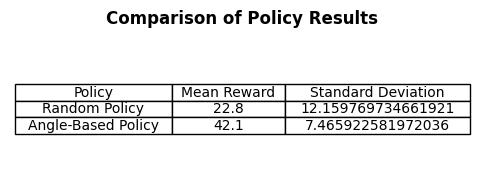

The angle-based policy outperforms the random policy.


In [54]:
# Create a dictionary with policy results
results = {
    "Policy": ["Random Policy", "Angle-Based Policy"],
    "Mean Reward": [random_mean, angle_mean],
    "Standard Deviation": [random_std, angle_std]
}

# Convert the dictionary into a pandas DataFrame
results_df = pd.DataFrame(results)

# Create a Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(6, 2))  # Adjust size for better readability
ax.axis('tight')
ax.axis('off')

# Create a table and add it to the plot
table = ax.table(cellText=results_df.values,
                 colLabels=results_df.columns,
                 cellLoc='center',
                 loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1, 2])  # Adjust column width

# Display the table
plt.title("Comparison of Policy Results", fontsize=12, fontweight="bold")
plt.show()

# Determine which policy performed better
if angle_mean > random_mean:
    print("The angle-based policy outperforms the random policy.")
else:
    print("The random policy performs better than the angle-based policy.")


<h1>Step 5: Mean Reward and Standard Deviation of a Condition-Based Random Policy<h1>
<h3>If the pole's angle is greater than 0.1, the agent will move right <h3>
<h3>If the pole's angle is less than -0.1, the agent will move left <h3>

In [57]:
# Define a function to execute a conditional random policy
def conditional_random_policy(environment, num_episodes=40):
    """
    Executes a random policy with conditional action selection in the given environment.

    Parameters:
        environment: The environment in which the policy is executed.
        num_episodes (int): Number of episodes to run the policy (default is 40).

    Returns:
        episode_rewards (list): Total rewards collected in each episode.
        mean_reward (float): Average reward over all episodes.
        std_reward (float): Standard deviation of rewards across episodes.
    """

    episode_rewards = []  # List to store total rewards for each episode

    # Execute the policy for a specified number of episodes
    for _ in range(num_episodes):
        state, _ = environment.reset()  # Reset the environment and obtain the initial state
        cumulative_reward = 0  # Initialize the total reward for the current episode
        done = False  # Flag to indicate whether the episode has ended

        # Continue taking actions until the episode terminates
        while not done:
            angle = state[2]  # Extract the angle of the pole from the state

            # Action selection based on the pole's angle
            if angle > 0.1:
                action = 1  # Move right if the pole is tilted significantly to the right
            elif angle < -0.1:
                action = 0  # Move left if the pole is tilted significantly to the left
            else:
                action = environment.action_space.sample()  # Choose a random action otherwise

            # Apply the selected action and receive the next state, reward, and termination info
            state, reward, terminated, truncated, _ = environment.step(action)

            # Accumulate the reward
            cumulative_reward += reward

            # Check if the episode has ended (either naturally or due to time limit)
            done = terminated or truncated

        # Store the total reward obtained in this episode
        episode_rewards.append(cumulative_reward)

    # Compute the mean and standard deviation of rewards across episodes
    mean_reward = np.mean(episode_rewards)
    std_reward = np.std(episode_rewards)

    # Return the collected rewards, mean reward, and standard deviation
    return episode_rewards, mean_reward, std_reward

# Execute the conditional random policy on the CartPole environment
conditional_rewards, conditional_mean, conditional_std = conditional_random_policy(cartpole_env)

# Print the mean and standard deviation of rewards obtained from this policy
print(f"The mean reward achieved by the conditional random policy: {conditional_mean}")
print(f"The standard deviation of rewards obtained by the conditional random policy: {conditional_std}")


The mean reward achieved by the conditional random policy: 43.025
The standard deviation of rewards obtained by the conditional random policy: 28.569640792281586


<h1>Step 6: Final Comparison of Policies<h1>

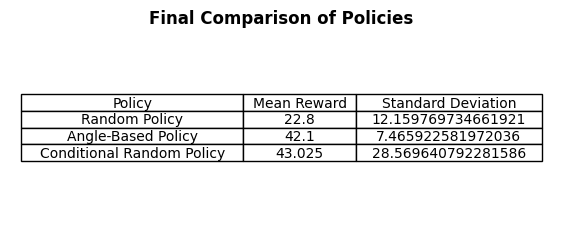

The best policy based on mean reward: Conditional Random Policy with a mean reward of 43.025


In [58]:
# Create a dictionary with policy results
results = {
    "Policy": ["Random Policy", "Angle-Based Policy", "Conditional Random Policy"],
    "Mean Reward": [random_mean, angle_mean, conditional_mean],
    "Standard Deviation": [random_std, angle_std, conditional_std]
}

# Convert the dictionary into a pandas DataFrame
results_df = pd.DataFrame(results)

# Create a Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(7, 2.5))  # Adjust size for better readability
ax.axis('tight')
ax.axis('off')

# Create a table and add it to the plot
table = ax.table(cellText=results_df.values,
                 colLabels=results_df.columns,
                 cellLoc='center',
                 loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1, 2])  # Adjust column width

# Display the table
plt.title("Final Comparison of Policies", fontsize=12, fontweight="bold")
plt.show()

# Determine the best policy based on the highest mean reward
best_policy = max(
    [("Random Policy", random_mean), ("Angle-Based Policy", angle_mean), ("Conditional Random Policy", conditional_mean)],
    key=lambda x: x[1]
)

# Print the best policy
print(f"The best policy based on mean reward: {best_policy[0]} with a mean reward of {best_policy[1]}")


<h1>Visualization of Policies Based on Mean Reward and Standard Deviation<h1>

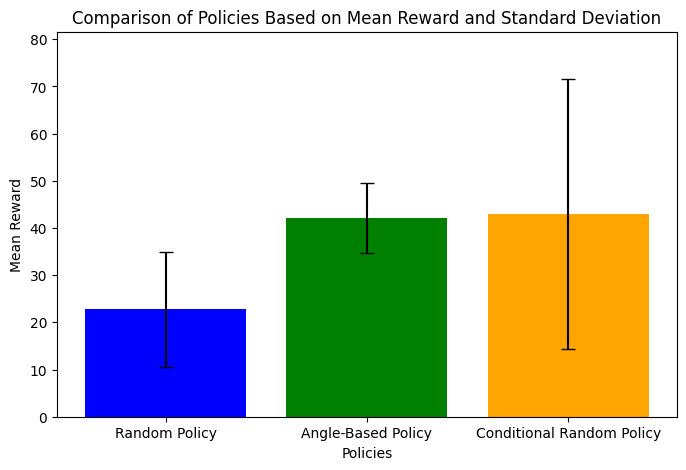

In [59]:
# Define policy names and corresponding values
policies = ["Random Policy", "Angle-Based Policy", "Conditional Random Policy"]
mean_rewards = [random_mean, angle_mean, conditional_mean]
std_devs = [random_std, angle_std, conditional_std]

# Set figure size
plt.figure(figsize=(8, 5))

# Plot bars for mean rewards with error bars for standard deviation
plt.bar(policies, mean_rewards, yerr=std_devs, capsize=5, color=['blue', 'green', 'orange'])

# Add labels and title
plt.xlabel("Policies")
plt.ylabel("Mean Reward")
plt.title("Comparison of Policies Based on Mean Reward and Standard Deviation")
plt.ylim(0, max(mean_rewards) + max(std_devs) + 10)  # Adjust y-axis limit for clarity

# Display the chart
plt.show()
